# 이진분류(binary_crossentropy)

## 1. 페암 수술 환자의 생존률 예측하기

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

l_d_set = np.loadtxt('./data/ThoraricSurgery3.csv', delimiter = ",")

X = l_d_set[:, 0:16]
y = l_d_set[:, 16]

# 딥러닝 모델의 구조를 결정.
model = Sequential()
# model.summary()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# model.summary()

# 딥러닝 모모델을 실행
model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics = ['acc'])
history = model.fit(X, y, epochs = 5, batch_size = 16)

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - acc: 0.8361 - loss: 2.0125
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - acc: 0.8825 - loss: 0.4093
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - acc: 0.8370 - loss: 0.4597
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - acc: 0.8285 - loss: 0.4696
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - acc: 0.8701 - loss: 0.3900


## 2. 파마 인디언 비만도 조사 관련 데이터 셋

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# !git clone https://github.com/taehojo/datagit

pi_df = pd.read_csv('./data/pima-indians-diabetes3.csv')

pi_df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
pi_df.diabetes.value_counts()
pi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plasma,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


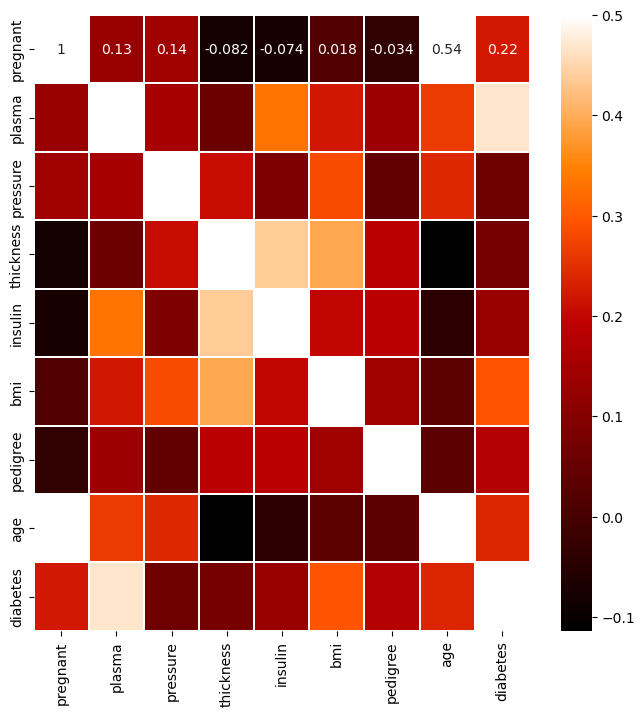

In [43]:
colormap = plt.cm.gist_heat
plt.figure(figsize=(8,8))

sns.heatmap(pi_df.corr(), linewidths=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot = True)
plt.show()

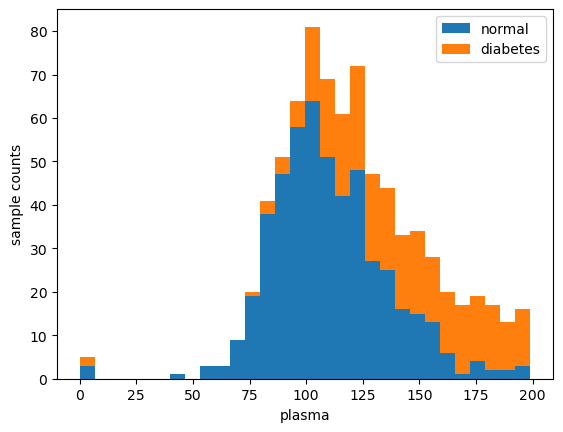

In [52]:
# 주요 데이터 추출

plt.hist(x = [pi_df.plasma[pi_df.diabetes ==0], pi_df.plasma[pi_df.diabetes==1]], bins = 30, histtype='barstacked', 
        label=['normal', 'diabetes'])
plt.xlabel('plasma')
plt.ylabel('sample counts')
plt.legend()
plt.show()

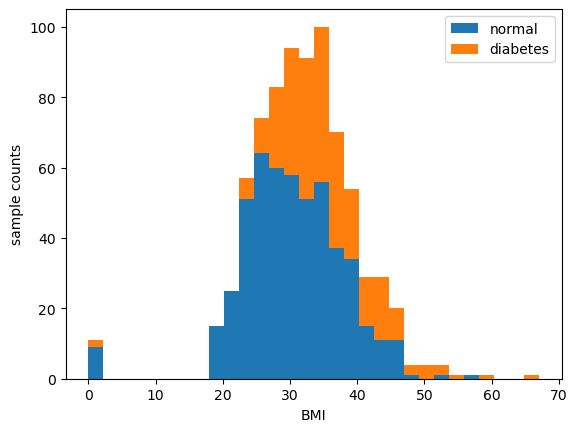

In [51]:
# 주요 데이터 추출

plt.hist(x = [pi_df.bmi[pi_df.diabetes ==0], pi_df.bmi[pi_df.diabetes==1]], bins = 30, histtype='barstacked', 
        label=['normal', 'diabetes'])
plt.xlabel('BMI')
plt.ylabel('sample counts')
plt.legend()
plt.show()

In [58]:
pi_df

X = pi_df.iloc[:,0:8]
y = pi_df.iloc[:,8]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [59]:
# 모델 구조 설정
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name = 'Dense_1'))
model.add(Dense(8, activation='relu', name = 'Dense_2'))
model.add(Dense(1, activation='sigmoid', name = 'Dense_3'))
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Dense_1 (Dense)                 │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X, y, epochs =100, batch_size = 5)

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - acc: 0.6333 - loss: 2.7910
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - acc: 0.5926 - loss: 0.7435
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - acc: 0.6548 - loss: 0.7114
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - acc: 0.6178 - loss: 0.7086
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - acc: 0.6666 - loss: 0.6660
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - acc: 0.6705 - loss: 0.6462
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - acc: 0.6851 - loss: 0.6472
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - acc: 0.6481 - loss: 0.6446
Epoch 9/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - acc: 0.6607 - loss: 0.6260
Epoch 10/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - acc: 0.6714 - loss: 0.6088
Epoch 11/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - acc: 0.7035 - loss: 0.5901
Epoch 12/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - acc: 0.6889 - lo